<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Download the dataset

In [2]:
import pandas as pd
df = pd.read_excel (r'Input+Data+Synthetic+%28created+but+not+used+in+our+project%29.xlsx', sheet_name='Sheet1')


 Pre-Processing, Data Visualisation and EDA
 
- Understanding the structure of data 
- Missing points in data 
- Finding inconsistencies in the data 
- Visualising different patterns 
- Visualising different text features 
- Dealing with missing values 
- Text preprocessing 
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Exploring the given Data files

In [3]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [4]:
df.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

In [6]:
df['Assignment group'].nunique()

74

**Observations**:
    
* There are 74 assignment groups / Target classes in the given dataset
*  Group 0  has 3976 records where as Many groups have only one 1 records.
 

In [9]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [10]:
df.columns[df.isna().any()].tolist()

['Short description', 'Description']

In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_data = pd.DataFrame({'Feature Name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_data)

                        Feature Name  percent_missing
Short description  Short description         0.094118
Description              Description         0.011765
Caller                        Caller         0.000000
Assignment group    Assignment group         0.000000


There are 8 records having short description null. And one data having description null

### Verify the duplicate data

In [12]:
df.duplicated().sum()

83

**There are 83 duplicate records available**

In [15]:
df[df.duplicated(keep=False)]

Short description  \
39                           call for ecwtrjnq jpecxuty   
51                           call for ecwtrjnq jpecxuty   
126                                    blank call //gso   
229                          call for ecwtrjnq jpecxuty   
230                                         blank call    
...                                                 ...   
8051               issue on pricing in distributor_tool   
8092  reset passwords for prgthyuulla ramdntythanjes...   
8093  reset passwords for prgthyuulla ramdntythanjes...   
8347                           blank call // loud noise   
8405                           unable to launch outlook   

                                            Description             Caller  \
39                           call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
51                           call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
126                                    blank call //gso  rbozivdq gmlhrtvp   
229                          call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
230                                         blank call   rbozivdq gmlhrtvp   
...                                                 ...                ...   
8051  we have agreed price with many of the distribu...  hbmwlprq ilfvyodx   
8092                                                the  boirqctx bkijgqry   
8093                                                the  boirqctx bkijgqry   
8347                           blank call // loud noise  rbozivdq gmlhrtvp   
8405                           unable to launch outlook  wjtzrmqc ikqpbflg   

     Assignment group  
39              GRP_0  
51              GRP_0  
126             GRP_0  
229             GRP_0  
230             GRP_0  
...               ...  
8051           GRP_21  
8092           GRP_17  
8093           GRP_17  
8347            GRP_0  
8405            GRP_0  

[140 rows x 4 columns]

In [16]:
df.shape

(8500, 4)

In [17]:
new_df= df.copy()

## Dropping duplicate values retaining only the first occurance

In [18]:

new_df.drop_duplicates(keep="first",inplace=True)

In [240]:
new_df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
group_id             0
com_desc             9
dtype: int64

In [182]:
new_df.shape

(8417, 4)

In [183]:
duplicate_records = df.shape[0] - new_df.shape[0]

In [184]:
duplicate_records

83

In [185]:
df.loc[df['Short description'] == 'call for ecwtrjnq jpecxuty']

Short description                 Description  \
39    call for ecwtrjnq jpecxuty  call for ecwtrjnq jpecxuty   
51    call for ecwtrjnq jpecxuty  call for ecwtrjnq jpecxuty   
229   call for ecwtrjnq jpecxuty  call for ecwtrjnq jpecxuty   
2714  call for ecwtrjnq jpecxuty  call for ecwtrjnq jpecxuty   
3085  call for ecwtrjnq jpecxuty  call for ecwtrjnq jpecxuty   
3219  call for ecwtrjnq jpecxuty  call for ecwtrjnq jpecxuty   
4303  call for ecwtrjnq jpecxuty  call for ecwtrjnq jpecxuty   

                 Caller Assignment group  
39    olckhmvx pcqobjnd            GRP_0  
51    olckhmvx pcqobjnd            GRP_0  
229   olckhmvx pcqobjnd            GRP_0  
2714  olckhmvx pcqobjnd            GRP_0  
3085  olckhmvx pcqobjnd            GRP_0  
3219  olckhmvx pcqobjnd            GRP_0  
4303  olckhmvx pcqobjnd            GRP_0

In [241]:
new_df.loc[new_df['Short description'] == 'call for ecwtrjnq jpecxuty']

Short description                 Description             Caller  \
39  call for ecwtrjnq jpecxuty  call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   

   Assignment group group_id  \
39            GRP_0        0   

                                             com_desc  
39  call for ecwtrjnq jpecxuty call for ecwtrjnq j...

In [244]:
new_df.loc[new_df['Short description'] == '']

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group, group_id, com_desc]
Index: []

In [25]:
new_df.isnull().values.any()


True

In [26]:
new_df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

### As number of null values are 8 and 1, this will not affect much on model building so removing it

In [27]:
new_df.dropna(inplace=True)

In [28]:
new_df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [29]:
new_df.duplicated().sum()


0

### Create group id with Integer for model building

In [31]:
new_df['group_id']=new_df['Assignment group'].str.slice(4, 6)

### Method to compare 2 columns and return the result
### Same value returns same, different values append both

In [36]:
def compareString(str1, str2):
    if(str1==str2):
        str3=str1
    else:
        str3=str1+' '+str2
    return str3

In [41]:
new_df['Final_Desc']=new_df.apply(lambda x: compareString(x['Short description'], x['Description']), axis=1)

In [44]:
new_df.drop(['com_desc','Final-Desc'],inplace=True, axis=1)

In [45]:
new_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group group_id                                         Final_Desc  
0            GRP_0        0  login issue -verified user details.(employee# ...  
1            GRP_0        0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...  
2            GRP_0        0  cant log in to vpn _x000D_\n_x000D_\nreceived ...  
3            GRP_0        0                      unable to access hr_tool page  
4            GRP_0        0                                       skype error

In [256]:
col='group_id'

In [193]:
new_df[col].value_counts()

0     3934
8      645
24     285
12     257
9      252
      ... 
67       1
64       1
61       1
35       1
70       1
Name: group_id, Length: 74, dtype: int64

In [257]:
df['Assignment group'].describe().T

count      8500
unique       74
top       GRP_0
freq       3976
Name: Assignment group, dtype: object

In [258]:
df['Assignment group'].nunique()

74

In [124]:
import matplotlib.pyplot as plt
# importing the required library
plt.style.use('fivethirtyeight')
import seaborn as sns

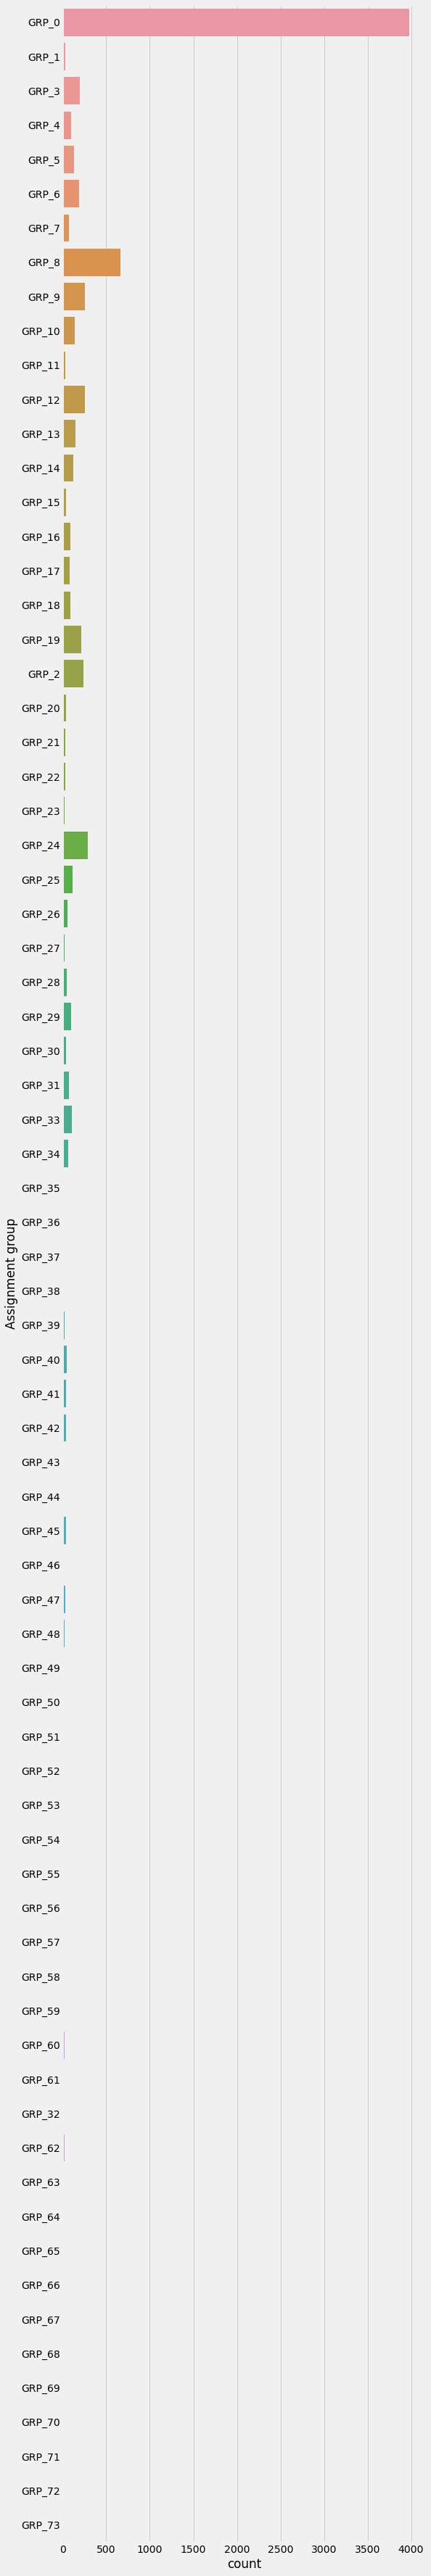

In [196]:


plt.figure(figsize = (8, 60))
 
# read a tips.csv file from seaborn library
#df = sns.load_dataset('tips')
 
# count plot on single categorical variable
sns.countplot(y ='Assignment group', data = df)
 
# Show the plot
plt.show()

In [203]:
df['Assignment group'].value_counts().max()

3976

In [204]:
## To get most frequent Assignment Group

In [205]:
n = 5
df['Assignment group'].value_counts().values.tolist()[:n]

[3976, 661, 289, 257, 252]

In [206]:
df['Assignment group'].value_counts().min()

1

In [207]:
# Using groupby() and count()
df2 = df.groupby(['Assignment group'])['Assignment group'].count()
print(df2)


Assignment group
GRP_0     3976
GRP_1       31
GRP_10     140
GRP_11      30
GRP_12     257
          ... 
GRP_71       2
GRP_72       2
GRP_73       1
GRP_8      661
GRP_9      252
Name: Assignment group, Length: 74, dtype: int64


In [46]:

# Sorting after groupby() & count()
# Sorting group keys on descending order
groupedDF = new_df.groupby('group_id',sort=False).count()
sortedDF=groupedDF.sort_values('group_id', ascending=False)
print(sortedDF)


          Short description  Description  Caller  Assignment group  Final_Desc
group_id                                                                      
9                       252          252     252               252         252
8                       645          645     645               645         645
73                        1            1       1                 1           1
72                        2            2       2                 2           2
71                        2            2       2                 2           2
...                     ...          ...     ...               ...         ...
12                      257          257     257               257         257
11                       30           30      30                30          30
10                      140          140     140               140         140
1                        31           31      31                31          31
0                      3926         3926    3926    

In [47]:
new_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group group_id                                         Final_Desc  
0            GRP_0        0  login issue -verified user details.(employee# ...  
1            GRP_0        0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...  
2            GRP_0        0  cant log in to vpn _x000D_\n_x000D_\nreceived ...  
3            GRP_0        0                      unable to access hr_tool page  
4            GRP_0        0                                       skype error

In [48]:
data=new_df[['Final_Desc','group_id']].copy()

In [49]:
data.head()

Final_Desc group_id
0  login issue -verified user details.(employee# ...        0
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...        0
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...        0
3                      unable to access hr_tool page        0
4                                       skype error         0

In [211]:
data.dtypes

com_desc    object
group_id    object
dtype: object

In [50]:
data['Final_Desc']=data['Final_Desc'].astype(str) 

In [51]:
data['group_id']=data['group_id'].astype(str).astype(int)

In [52]:
data.dtypes

Final_Desc    object
group_id       int32
dtype: object

In [53]:
data.head()

Final_Desc  group_id
0  login issue -verified user details.(employee# ...         0
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...         0
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...         0
3                      unable to access hr_tool page         0
4                                       skype error          0

In [55]:
data['length']=data.apply(lambda x:len(x.Final_Desc), axis=1)

In [58]:
data.head()

Final_Desc  group_id  length
0  login issue -verified user details.(employee# ...         0     242
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...         0     250
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...         0     154
3                      unable to access hr_tool page         0      29
4                                       skype error          0      12

In [60]:
def wordCount(sentence):
    try:
        count=len(sentence.split())
    except:
        count=0
    return count

In [63]:
data['word_count']=data.apply(lambda x:wordCount(x.Final_Desc), axis=1)

In [64]:
data.head()

Final_Desc  group_id  length  \
0  login issue -verified user details.(employee# ...         0     242   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...         0     250   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...         0     154   
3                      unable to access hr_tool page         0      29   
4                                       skype error          0      12   

   word_count  
0          35  
1          31  
2          21  
3           5  
4           2

In [57]:
print("Maximum Length of the sentences from DataFrame = ",data['length'].max())

Maximum Length of the sentences from DataFrame =  14544


In [293]:
print("Minimum Length of the sentences from DataFrame = ",data['length'].min())

Minimum Length of the sentences from DataFrame =  3


In [294]:
data.loc[data['length'] == data['length'].max()]

Description  \
7345  we are seeing activity indicating the host at ...   

                                               com_desc  group_id  length  
7345  security incidents - ( sw #in33501789 ) : broa...         2   14544

In [295]:
data.loc[data['length'] == data['length'].min()]

Description com_desc  group_id  length
1860           s      s s         0       3

In [72]:
data.isna().sum()

Final_Desc    0
group_id      0
length        0
word_count    0
dtype: int64

In [73]:
data.isnull().sum()

Final_Desc    0
group_id      0
length        0
word_count    0
dtype: int64

In [74]:
 data.columns[df.isna().any()].tolist()

['Final_Desc', 'group_id']

In [75]:
data.dropna(inplace=True)

In [277]:
data.isnull().sum()

Description    0
com_desc       0
group_id       0
dtype: int64

In [77]:
data['Final_Desc'].value_counts()

windows password reset                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   29
password reset                                                                                                                                                                              

In [79]:
data.head()

Final_Desc  group_id  length  \
0  login issue -verified user details.(employee# ...         0     242   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...         0     250   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...         0     154   
3                      unable to access hr_tool page         0      29   
4                                       skype error          0      12   

   word_count  
0          35  
1          31  
2          21  
3           5  
4           2

In [80]:
data.dtypes

Final_Desc    object
group_id       int32
length         int64
word_count     int64
dtype: object

In [82]:
#library that contains punctuation
import string
string.punctuation
import re, string
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output=  ' '.join([word for word in text.split() if word not in stopwords])
    return output

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

# Remove html tags
def removeHTML(text):
    regex = re.compile('<.*?>')
    return re.sub(regex, ' ', text)

# Remove URLs
def removeURL(text):
    regex = re.compile('http[s]?://\S+')
    return re.sub(regex, ' ', text)

# remove numbers, punctuation and any special characters (keep only alphabets)
def onlyAlphabets(text):
    regex = re.compile('[^a-zA-Z]')
    return re.sub(regex, ' ', text)


In [83]:
def lemmetize(text):
     # Create an empty list containing lemmatized words
    lemmatized_list = []
    text_words = text.split(" ")
    
    #print(text_words)
    
    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    
    #print(lemmatized_list)
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    #print(lemmatized_text)
    return lemmatized_text

In [84]:

def removeSpaces(text):
    # Strip unwanted spaces
    return text.strip()

In [85]:
wordcloud = [[], []]
all_sentences = []    # All cleaned sentences


for x in range(len(new_df['Final_Desc'].values)):
    headline = new_df['Final_Desc'].values[x]
    assignment_group = new_df['group_id'].values[x]

    #print("before ",headline)
    cleaned_sentence = []
   
    # Remove URL
    sentence = removeURL(headline) 
    
    # Remove HTML
    sentence = removeHTML(sentence)
    
    # Get only alphabets
    sentence = onlyAlphabets(sentence)
    
    #Convert to lower case
    sentence = sentence.lower()
    
    #Remove punctuation
    sentence=remove_punctuation(sentence)

    #Remove stop words
    sentence= remove_stopwords(sentence)
    
    #Remove spaces
    sentence=removeSpaces(sentence)
       
    #Lemmetize
    sentence=lemmetize(sentence)          

    all_sentences.append(''.join(sentence))

In [86]:
print(x)

8407


In [87]:
len(all_sentences)

8408

In [88]:
data['final_description'] = all_sentences

In [99]:
data.head(20)

Final_Desc  group_id  \
0   login issue -verified user details.(employee# ...         0   
1   outlook _x000D_\n_x000D_\nreceived from: hmjdr...         0   
2   cant log in to vpn _x000D_\n_x000D_\nreceived ...         0   
3                       unable to access hr_tool page         0   
4                                        skype error          0   
5      unable to log in to engineering tool and skype         0   
6   event: critical:HostName_221.company.com the v...         1   
7   ticket_no1550391- employment status - new non-...         0   
8                unable to disable add ins on outlook         0   
9                     ticket update on inplant_874773         0   
10  engineering tool says not connected and unable...         0   
11            hr_tool site not loading page correctly         0   
12  unable to login to hr_tool to sgxqsuojr xwbeso...         0   
13                   user wants to reset the password         0   
14                           unable to open payslips          0   
15                    ticket update on inplant_874743         0   
16  unable to login to company vpn \n\nreceived fr...         0   
17      when undocking pc , screen will not come back         3   
18                          erp SID_34 account locked         0   
19                            unable to sign into vpn         0   

                                    final_description  
0   login issue verify user detail employee manage...  
1   outlook x x receive hmjdrvpb komuaywn gmail co...  
2   cant log vpn x x receive eylqgodm ybqkwiam gma...  
3                          unable access hr tool page  
4                                         skype error  
5                      unable log engineer tool skype  
6   event critical hostname company com value moun...  
7   ticket employment status new non employee ente...  
8                      unable disable add ins outlook  
9                               ticket update inplant  
10     engineer tool say connect unable submit report  
11                   hr tool site load page correctly  
12       unable login hr tool sgxqsuojr xwbesorf card  
13                           user want reset password  
14                               unable open payslips  
15                              ticket update inplant  
16  unable login company vpn receive xyz company c...  
17                         undock pc screen come back  
18                               erp sid account lock  
19                                    unable sign vpn

In [100]:
data.drop(['Final_Desc'],inplace=True, axis=1)


In [101]:
data.head()

group_id                                  final_description
0         0  login issue verify user detail employee manage...
1         0  outlook x x receive hmjdrvpb komuaywn gmail co...
2         0  cant log vpn x x receive eylqgodm ybqkwiam gma...
3         0                         unable access hr tool page
4         0                                        skype error

In [103]:
data['word_count']=data.apply(lambda x:wordCount(x.final_description), axis=1)

In [105]:
data['length']=data.apply(lambda x:len(x.final_description), axis=1)

In [112]:
data.head(60)

group_id                                  final_description  word_count  \
0          0  login issue verify user detail employee manage...          28   
1          0  outlook x x receive hmjdrvpb komuaywn gmail co...          28   
2          0  cant log vpn x x receive eylqgodm ybqkwiam gma...          21   
3          0                         unable access hr tool page           5   
4          0                                        skype error           2   
5          0                     unable log engineer tool skype           5   
6          1  event critical hostname company com value moun...          29   
7          0  ticket employment status new non employee ente...           9   
8          0                     unable disable add ins outlook           5   
9          0                              ticket update inplant           3   
10         0     engineer tool say connect unable submit report           7   
11         0                   hr tool site load page correctly           6   
12         0       unable login hr tool sgxqsuojr xwbesorf card           7   
13         0                           user want reset password           4   
14         0                               unable open payslips           3   
15         0                              ticket update inplant           3   
16         0  unable login company vpn receive xyz company c...          32   
17         3                         undock pc screen come back           5   
18         0                               erp sid account lock           4   
19         0                                    unable sign vpn           3   
20         0                              unable check payslips           3   
21         0  vpn issue x x receive ugephfta hrbqkvij gmail ...          65   
22         0                                 unable connect vpn           3   
23         0                      user call vendor phone number           5   
24         0  vpn work receive dceoufyz saufqkmd gmail com h...          22   
25         0                             erp sid password reset           4   
26         0                unable login hr tool check payslips           6   
27         0                                       account lock           2   
28         0                               unable login hr tool           4   
29         0                                 unable log erp sid           4   
30         0              password reset collaboration platform           4   
31         0  reset users hi please reset users password cli...          11   
32         4  duplication network address receive kxsceyzo n...          46   
33         0                                 ess password reset           3   
34         0                        unable install flash player           4   
35         0  ticket employment status new non employee tick...          13   
36         0              erp sid account unlock password reset           6   
37         0  unable resolve ticket assign self status butto...           9   
38         0  instal engineer tool need install engineer too...           8   
39         0                             call ecwtrjnq jpecxuty           3   
40         0                              ticket update inplant           3   
41         0                                  tablet sound work           3   
42         0                                unable login system           3   
43         5  please reroute job printer printer issue need ...          64   
44         0                         unable login hr tool etime           5   
45         0               log hr tool etime single sign portal           7   
46         0  password change password management tool didnt...           9   
47         6  job job fail job scheduler receive monitor too...          17   
48         0  windows password change via password managemen...           7   
49         7  status change telephony software close c

In [111]:
temp_data=data.copy()

In [116]:
data.reset_index(drop=True, inplace=True)

In [117]:
data.head(60)

group_id                                  final_description  word_count  \
0          0  login issue verify user detail employee manage...          28   
1          0  outlook x x receive hmjdrvpb komuaywn gmail co...          28   
2          0  cant log vpn x x receive eylqgodm ybqkwiam gma...          21   
3          0                         unable access hr tool page           5   
4          0                                        skype error           2   
5          0                     unable log engineer tool skype           5   
6          1  event critical hostname company com value moun...          29   
7          0  ticket employment status new non employee ente...           9   
8          0                     unable disable add ins outlook           5   
9          0                              ticket update inplant           3   
10         0     engineer tool say connect unable submit report           7   
11         0                   hr tool site load page correctly           6   
12         0       unable login hr tool sgxqsuojr xwbesorf card           7   
13         0                           user want reset password           4   
14         0                               unable open payslips           3   
15         0                              ticket update inplant           3   
16         0  unable login company vpn receive xyz company c...          32   
17         3                         undock pc screen come back           5   
18         0                               erp sid account lock           4   
19         0                                    unable sign vpn           3   
20         0                              unable check payslips           3   
21         0  vpn issue x x receive ugephfta hrbqkvij gmail ...          65   
22         0                                 unable connect vpn           3   
23         0                      user call vendor phone number           5   
24         0  vpn work receive dceoufyz saufqkmd gmail com h...          22   
25         0                             erp sid password reset           4   
26         0                unable login hr tool check payslips           6   
27         0                                       account lock           2   
28         0                               unable login hr tool           4   
29         0                                 unable log erp sid           4   
30         0              password reset collaboration platform           4   
31         0  reset users hi please reset users password cli...          11   
32         4  duplication network address receive kxsceyzo n...          46   
33         0                                 ess password reset           3   
34         0                        unable install flash player           4   
35         0  ticket employment status new non employee tick...          13   
36         0              erp sid account unlock password reset           6   
37         0  unable resolve ticket assign self status butto...           9   
38         0  instal engineer tool need install engineer too...           8   
39         0                             call ecwtrjnq jpecxuty           3   
40         0                              ticket update inplant           3   
41         0                                  tablet sound work           3   
42         0                                unable login system           3   
43         5  please reroute job printer printer issue need ...          64   
44         0                         unable login hr tool etime           5   
45         0               log hr tool etime single sign portal           7   
46         0  password change password management tool didnt...           9   
47         6  job job fail job scheduler receive monitor too...          17   
48         0  windows password change via password managemen...           7   
49         7  status change telephony software close c

In [120]:
data.iloc[51]

group_id                                                             0
final_description    vip need password management tool password man...
word_count                                                          20
length                                                             133
Name: 51, dtype: object

In [91]:
all_sentences[0]

'login issue verify user detail employee manager name x check user name ad reset password x advise user login check x caller confirm able login x issue resolve'

In [92]:
all_sentences[899]

'setup new ws br usalikfj lfmpxbcn'

In [93]:
len(assignment_group)

2

In [94]:
assignment_group

'49'

In [121]:
from wordcloud import WordCloud

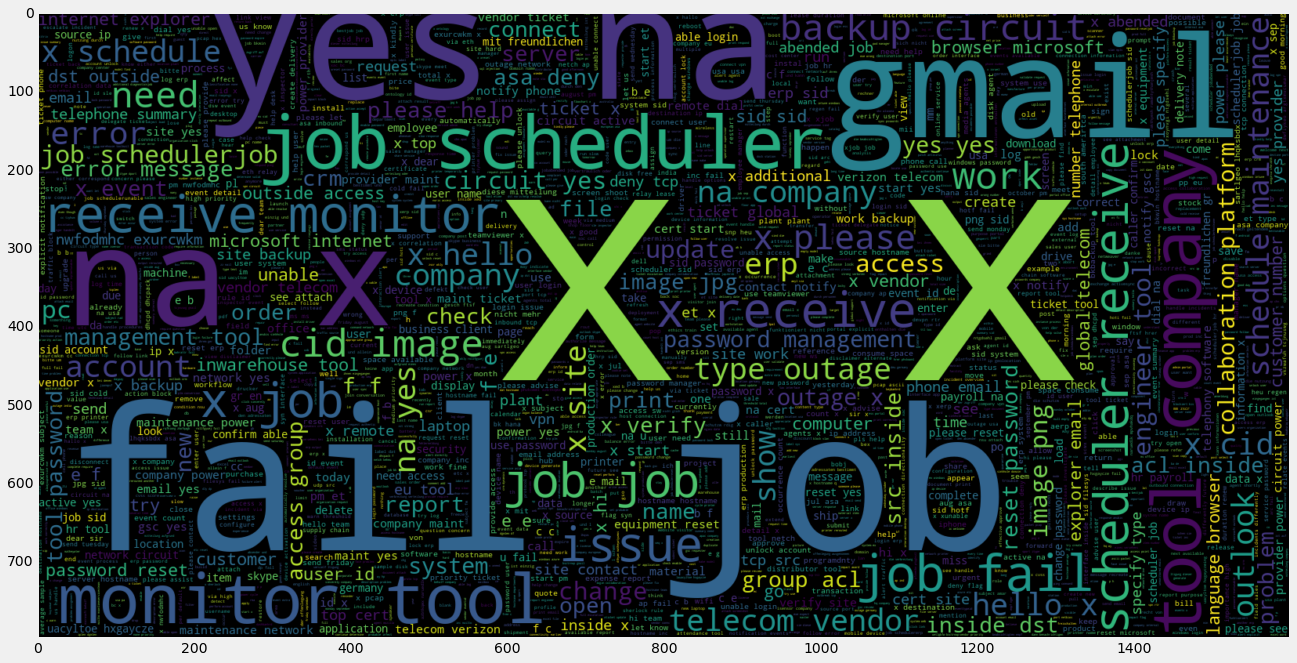

In [126]:
plt.figure(figsize = (20,20))
plt.grid(False)
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate("".join(data.final_description))
plt.imshow(wc , interpolation = 'bilinear')

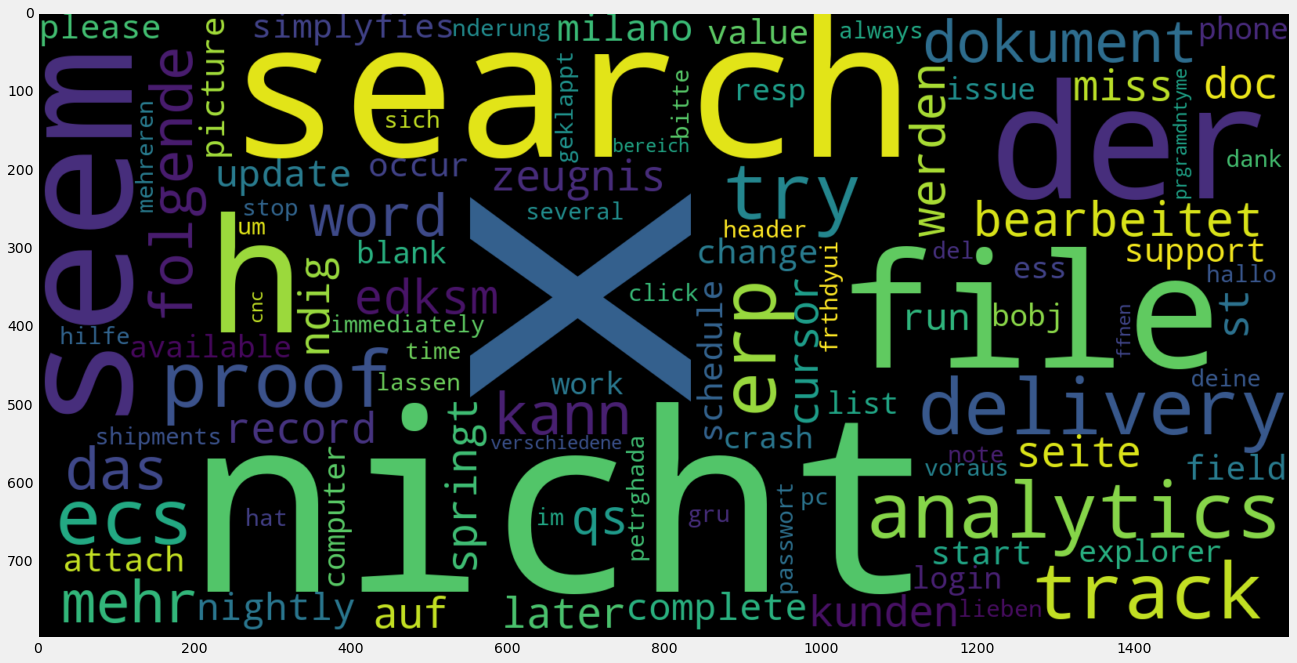

In [334]:
plt.figure(figsize = (20,20))
plt.grid(False)
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data['group_id'] ==49].final_description))
plt.imshow(wc , interpolation = 'bilinear')

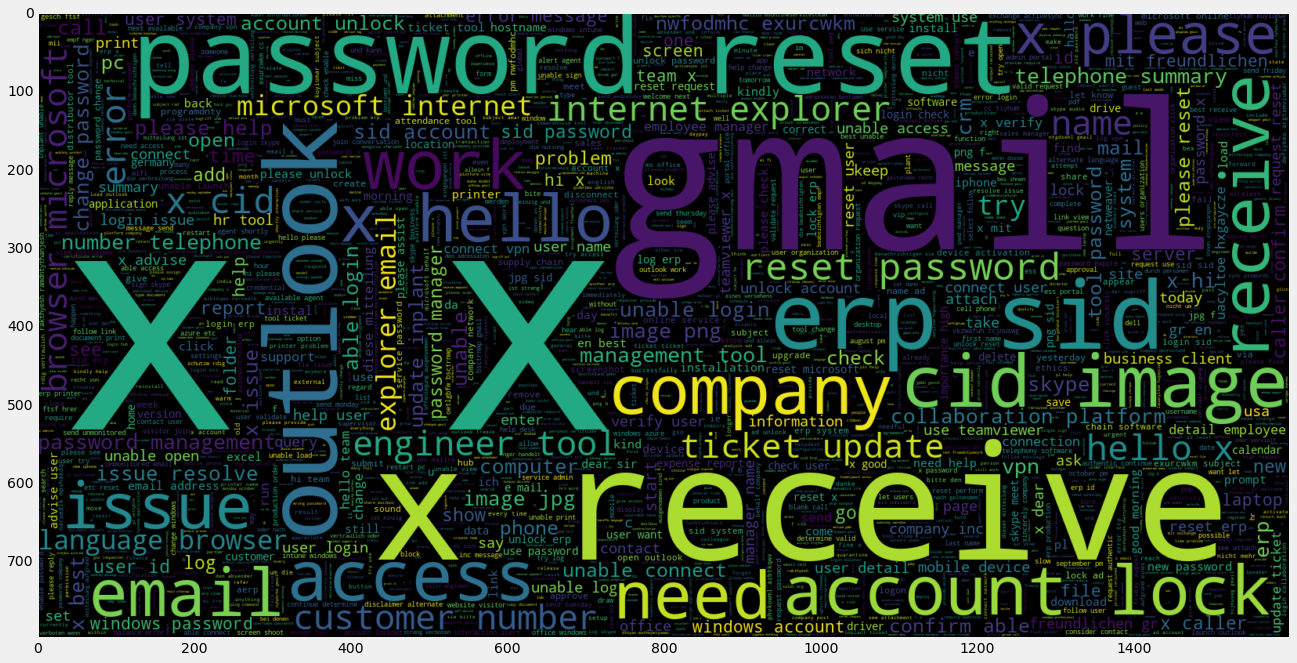

In [335]:
plt.figure(figsize = (20,20))
plt.grid(False)
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data['group_id'] ==0].final_description))
plt.imshow(wc , interpolation = 'bilinear')

In [67]:
## Checking the counts

In [127]:
df_value_counts=data['group_id'].value_counts().to_frame()

In [128]:
df_value_counts.head(50)

group_id
0       3926
8        645
24       285
12       257
9        252
2        241
19       215
3        200
6        183
13       145
10       140
5        128
14       118
25       116
33       107
4        100
29        97
18        88
16        85
31        69
7         68
17        68
34        61
26        56
40        45
28        44
41        40
30        39
15        38
42        37
20        36
45        35
1         31
22        31
11        30
21        28
47        27
48        25
62        25
23        25
39        19
27        18
60        16
37        16
36        15
44        15
50        14
53        11
65        11
52         9

In [129]:
sub_df = data[data.groupby('group_id').group_id.transform('count')>100].copy() 

In [130]:
sub_df_value_counts=sub_df['group_id'].value_counts().to_frame()

In [131]:
sub_df_value_counts

group_id
0       3926
8        645
24       285
12       257
9        252
2        241
19       215
3        200
6        183
13       145
10       140
5        128
14       118
25       116
33       107

In [132]:
sub_df.head(10)

group_id                                  final_description  word_count  \
0          0  login issue verify user detail employee manage...          28   
1          0  outlook x x receive hmjdrvpb komuaywn gmail co...          28   
2          0  cant log vpn x x receive eylqgodm ybqkwiam gma...          21   
3          0                         unable access hr tool page           5   
4          0                                        skype error           2   
5          0                     unable log engineer tool skype           5   
7          0  ticket employment status new non employee ente...           9   
8          0                     unable disable add ins outlook           5   
9          0                              ticket update inplant           3   
10         0     engineer tool say connect unable submit report           7   

    length  
0      158  
1      150  
2       87  
3       26  
4       11  
5       30  
7       57  
8       30  
9       21  
10      46

In [133]:
sub_df.shape

(6958, 4)

In [139]:
sub_df.reset_index(drop=True, inplace=True)

In [140]:
def find_num_words(data):
    wordlist = []
    splitting_list = data.str.split()
    for i in range(len(splitting_list)):
        for j in range(len(splitting_list[i])):
            wordlist.append(splitting_list[i][j])
            
    wordset = set(wordlist)
    
    print("total number of unique words",len(wordset))
    print("total number of words",len(wordlist))
   

In [141]:
find_num_words(sub_df.final_description)

total number of unique words 11460
total number of words 173112


In [142]:
ticket_data=sub_df.copy()

In [143]:
ticket_data.head()

group_id                                  final_description  word_count  \
0         0  login issue verify user detail employee manage...          28   
1         0  outlook x x receive hmjdrvpb komuaywn gmail co...          28   
2         0  cant log vpn x x receive eylqgodm ybqkwiam gma...          21   
3         0                         unable access hr tool page           5   
4         0                                        skype error           2   

   length  
0     158  
1     150  
2      87  
3      26  
4      11

In [158]:
max_features = 10000
maxlen = ticket_data['word_count'].max()
embedding_size = 200

In [160]:
maxlen

1476

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Apply Tokenizer to the final description

In [162]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(ticket_data['final_description']))

In [163]:
print("The word index",tokenizer.word_index)

The word index {'x': 1, 'job': 2, 'com': 3, 'tool': 4, 'company': 5, 'receive': 6, 'yes': 7, 'na': 8, 'scheduler': 9, 'fail': 10, 'password': 11, 'please': 12, 'gmail': 13, 'erp': 14, 'sid': 15, 'user': 16, 'issue': 17, 'access': 18, 'monitor': 19, 'reset': 20, 'ticket': 21, 'f': 22, 'e': 23, 'unable': 24, 'work': 25, 'account': 26, 'email': 27, 'error': 28, 'site': 29, 'hostname': 30, 'c': 31, 'need': 32, 'circuit': 33, 'outlook': 34, 'login': 35, 'power': 36, 'name': 37, 'help': 38, 'system': 39, 'network': 40, 'get': 41, 'id': 42, 'vendor': 43, 'hello': 44, 'b': 45, 'backup': 46, 'update': 47, 'telecom': 48, 'change': 49, 'use': 50, 'lock': 51, 'outage': 52, 'engineer': 53, 'connect': 54, 'server': 55, 'log': 56, 'start': 57, 'able': 58, 'vpn': 59, 'image': 60, 'open': 61, 'type': 62, 'inside': 63, 'phone': 64, 'message': 65, 'report': 66, 'cid': 67, 'request': 68, 'new': 69, 'printer': 70, 'try': 71, 'event': 72, 'windows': 73, 'time': 74, 'skype': 75, 'see': 76, 'et': 77, 'check':

In [164]:
print("The count of words",tokenizer.word_counts)

The count of words OrderedDict([('login', 638), ('issue', 1120), ('verify', 189), ('user', 1164), ('detail', 227), ('employee', 137), ('manager', 283), ('name', 627), ('x', 18793), ('check', 331), ('ad', 122), ('reset', 984), ('password', 1629), ('advise', 120), ('caller', 86), ('confirm', 136), ('able', 396), ('resolve', 219), ('outlook', 641), ('receive', 2122), ('hmjdrvpb', 2), ('komuaywn', 2), ('gmail', 1483), ('com', 2768), ('hello', 496), ('team', 322), ('meet', 84), ('skype', 352), ('etc', 69), ('appear', 57), ('calendar', 36), ('somebody', 2), ('please', 1596), ('correct', 68), ('kind', 57), ('cant', 23), ('log', 399), ('vpn', 392), ('eylqgodm', 3), ('ybqkwiam', 3), ('hi', 321), ('cannot', 285), ('best', 279), ('unable', 904), ('access', 1069), ('hr', 235), ('tool', 2260), ('page', 78), ('error', 726), ('engineer', 425), ('ticket', 971), ('employment', 8), ('status', 103), ('new', 371), ('non', 28), ('enter', 131), ('disable', 32), ('add', 213), ('ins', 2), ('update', 473), ('i

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Vocabulary Size

In [167]:
# Reserve padding (indexed zero)
w2i = tokenizer.word_index
vocab_size = len(w2i) + 1
print(f'Number of unique tokens: {vocab_size}')

Number of unique tokens: 11461


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Dependant and independant feature

In [144]:
X = ticket_data.final_description
y = ticket_data.group_id

In [414]:
X.head()

0    verify user detail employee manager name x che...
1    x x receive hmjdrvpb komuaywn gmail com x x he...
2    x x receive eylqgodm ybqkwiam gmail com x x hi...
3                           unable access hr tool page
4                                          skype error
Name: final_description, dtype: object

In [146]:
y.nunique()

15

In [145]:
y.unique()

array([ 0,  3,  5,  6,  8,  9, 10, 12, 13, 14, 19,  2, 24, 25, 33])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Split data into train and test

In [147]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=ticket_data['group_id'], test_size=0.20, random_state=42)

In [148]:
print("X_train.shape",X_train.shape)
print("y_train.shape",y_train.shape)
print("X_test.shape",X_test.shape)
print("y_test.shape",y_test.shape)
      

X_train.shape (5566,)
y_train.shape (5566,)
X_test.shape (1392,)
y_test.shape (1392,)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Vectorize using count vectorizer

In [149]:

# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_train_count = cv.fit_transform(X_train)
x_test_count = cv.transform(X_test)
print(x_train_count.shape)
print(x_test_count.shape)

(5566, 2500)
(1392, 2500)


In [150]:
from sklearn.naive_bayes import MultinomialNB

In [151]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
# Classifier - Algorithm - Naive Bayes
# fit the training dataset on the classifier
mb_classifier =MultinomialNB().fit(x_train_count,y_train)

# predict the labels on validation dataset
predictions_NB_count = mb_classifier.predict(x_test_count)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB_count, y_test)*100)

Naive Bayes Accuracy Score ->  75.86206896551724


In [152]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, predictions_NB_count)

In [153]:
labels=y_test.unique()

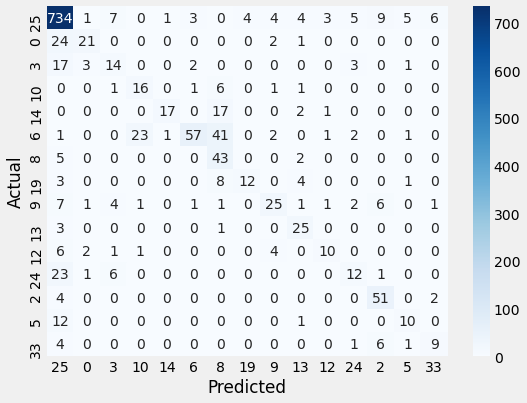

In [154]:
cm = confusion_matrix(y_test, predictions_NB_count)
#labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(8,6))
sns.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [155]:
# Classification report
print("Classification report")
print(classification_report(y_test,predictions_NB_count))

Classification report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       786
           2       0.72      0.44      0.55        48
           3       0.42      0.35      0.38        40
           5       0.39      0.62      0.48        26
           6       0.89      0.46      0.61        37
           8       0.89      0.44      0.59       129
           9       0.37      0.86      0.51        50
          10       0.75      0.43      0.55        28
          12       0.66      0.49      0.56        51
          13       0.61      0.86      0.71        29
          14       0.62      0.42      0.50        24
          19       0.48      0.28      0.35        43
          24       0.70      0.89      0.78        57
          25       0.53      0.43      0.48        23
          33       0.50      0.43      0.46        21

    accuracy                           0.76      1392
   macro avg       0.63      0.56      0.56      1392
weig

In [168]:
import pickle
with open('nlp_mb_model','wb') as file:
    pickle.dump(mb_classifier,file)

In [174]:
ticket_data.head(20)

group_id                                  final_description  word_count  \
0          0  login issue verify user detail employee manage...          28   
1          0  outlook x x receive hmjdrvpb komuaywn gmail co...          28   
2          0  cant log vpn x x receive eylqgodm ybqkwiam gma...          21   
3          0                         unable access hr tool page           5   
4          0                                        skype error           2   
5          0                     unable log engineer tool skype           5   
6          0  ticket employment status new non employee ente...           9   
7          0                     unable disable add ins outlook           5   
8          0                              ticket update inplant           3   
9          0     engineer tool say connect unable submit report           7   
10         0                   hr tool site load page correctly           6   
11         0       unable login hr tool sgxqsuojr xwbesorf card           7   
12         0                           user want reset password           4   
13         0                               unable open payslips           3   
14         0                              ticket update inplant           3   
15         0  unable login company vpn receive xyz company c...          32   
16         3                         undock pc screen come back           5   
17         0                               erp sid account lock           4   
18         0                                    unable sign vpn           3   
19         0                              unable check payslips           3   

    length  
0      158  
1      150  
2       87  
3       26  
4       11  
5       30  
6       57  
7       30  
8       21  
9       46  
10      32  
11      44  
12      24  
13      20  
14      21  
15     180  
16      26  
17      20  
18      15  
19      21

In [171]:
sample='unable access hr tool page'
cv = CountVectorizer(max_features = 2500)

In [ ]:
print('Evaluate model on sample Ticket lines'); print('--'*30)
statements = ['Are you always so stupid or is today a special ocassion?', #Sarcasm
              'undock pc screen come back.', #Sarcasm
              'If you find me offensive. Then I suggest you quit finding me.', #Sarcasm
              'If I wanted to kill myself I would climb your ego and jump to your IQ.', #Sarcasm
              'Amphibious pitcher makes debut', #Sarcasm
              'It\'s okay if you don\'t like me. Not everyone has good taste.' #Sarcasm
              ]

if(np.argmax(ticket_type) == 0):
      print(f'`{statement}` is a Non-sarcastic statement.')
  elif (np.argmax(ticket_type) == 1):
      print(f'`{statement}` is a Sarcastic statement.')

In [ ]:
print('Evaluate model on sample Ticket lines'); print('--'*30)
statements = ['Are you always so stupid or is today a special ocassion?', #0
              'undock pc screen come back.', #3
              
              ]

for statement in statements:
  #statement = statement.lower()
  #statement = replace_words(statement)
  #statement = remove_punctuation(statement)
  #statement = lem(statement)
  #statement = re.sub(' +', ' ', statement)

  headline = tokenizer.texts_to_sequences(statement)
  headline = pad_sequences(headline, maxlen = maxlen, dtype = 'int32', value = 0)

  ticket_type = (mb_classifier.predict(headline) > 0.5).astype('int32')
  

In [198]:
X_train.head()

6452                                unable launch outlook
1289    reset sid password jidhewlg jufskody could ple...
3754                call disconnect due vpn disconnection
3739                                ticket update inplant
760     eu tool plant plant work slowly please help im...
Name: final_description, dtype: object

In [178]:

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [200]:
tfidf_vect = TfidfVectorizer(max_features=5000)
tfidf_vect_fit = tfidf_vect.fit(X_train)

tfidf_train = tfidf_vect_fit.transform(X_train)
tfidf_test = tfidf_vect_fit.transform(X_test)

X_train_vect = pd.concat([X_train.reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test.reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)


In [201]:
X_train_vect.head()

final_description    0    1    2    3    4  \
0                              unable launch outlook  0.0  0.0  0.0  0.0  0.0   
1  reset sid password jidhewlg jufskody could ple...  0.0  0.0  0.0  0.0  0.0   
2              call disconnect due vpn disconnection  0.0  0.0  0.0  0.0  0.0   
3                              ticket update inplant  0.0  0.0  0.0  0.0  0.0   
4  eu tool plant plant work slowly please help im...  0.0  0.0  0.0  0.0  0.0   

     5    6    7    8  ...  4990  4991  4992  4993  4994  4995  4996  4997  \
0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   4998  4999  
0   0.0   0.0  
1   0.0   0.0  
2   0.0   0.0  
3   0.0   0.0  
4   0.0   0.0  

[5 rows x 5001 columns]

In [207]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns


In [194]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket_data['final_description'])

Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['final_description'])

tfidf_train = tfidf_vect_fit.transform(X_train['final_description'])
tfidf_test = tfidf_vect_fit.transform(X_test['final_description'])

In [183]:

# Classifier - Algorithm - Naive Bayes
# fit the training dataset on the classifier
mb_classifier =MultinomialNB().fit(Train_X_Tfidf,y_train)

# predict the labels on validation dataset
predictions_NB = mb_classifier.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  70.1867816091954


In [185]:
# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [189]:
# Classification report
print("Classification report")
print(classification_report(y_test,predictions_NB))

Classification report
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       786
           2       0.73      0.23      0.35        48
           3       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        26
           6       1.00      0.03      0.05        37
           8       0.53      0.95      0.68       129
           9       0.00      0.00      0.00        50
          10       0.00      0.00      0.00        28
          12       0.82      0.27      0.41        51
          13       0.00      0.00      0.00        29
          14       1.00      0.04      0.08        24
          19       0.00      0.00      0.00        43
          24       0.91      0.70      0.79        57
          25       0.00      0.00      0.00        23
          33       1.00      0.10      0.17        21

    accuracy                           0.70      1392
   macro avg       0.45      0.22      0.23      1392
weig

In [192]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

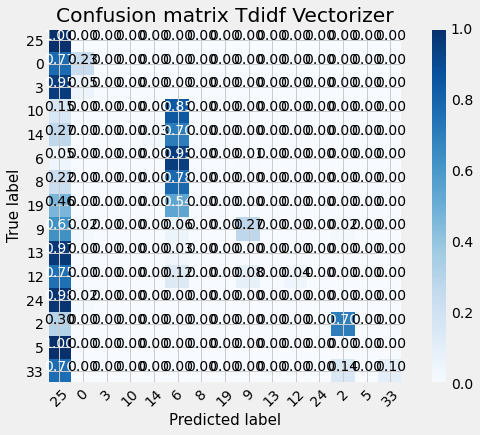

In [193]:
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_NB)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=True,
                      title='Confusion matrix Tdidf Vectorizer')